# 安装并导入必要的包

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import jieba.posseg as psg
import re

# 数据读取

In [3]:
# 加载评论数据
reviews = pd.read_csv('./crawl-结果.csv',encoding="utf-8")
reviews.head()

,Unnamed: 0,酒店名字,用户id,评论者,评分,入住时间,发布时间,入住目的,房间,内容
0,0,上海外滩璞硯酒店,595542632,gold97,5.0,2022-06,2022-06-14,家庭亲子,标准大床房,疫情不能离沪，周末来住住酒店。订了普通大床房，给免费升级成江景大床房，窗外能看到黄浦江、人民...
1,1,上海外滩璞硯酒店,581695718,手抓食反,5.0,2022-03,2022-03-18,情侣出游,高级大床房,保安师傅的态度很好，前台小哥哥小姐姐也不错，后面几天又继续续住。开了酒店白金会员一直升房。就...
2,2,上海外滩璞硯酒店,576087084,HAKI0222,2.5,2022-02,2022-02-20,朋友出游,豪华家庭房,首先吐槽一下酒店楼下停车场，没有免费停车就不说了，环境脏乱差，停车位也很少，80一天的收费标...
3,3,上海外滩璞硯酒店,575270386,118492****,1.2,2022-02,2022-02-15,独自旅行,外滩全景大床房,这个酒店是我入住那么多酒店中的奇葩。首先，房间还行，还算对得起这价格，当然这个主要考虑的是地...
4,4,上海外滩璞硯酒店,573962070,SwiftyJiukun,5.0,2022-02,2022-02-06,情侣出游,豪华大床房,预定的豪华大床房，但是因为没打扫完所以前台就帮忙升级到了外滩江景房。房型没有豪华大床房大，但...


In [4]:
#行数列数
reviews.shape

(2829, 10)

# 数据清洗

In [5]:
del reviews['评论者']
reviews.head()

,Unnamed: 0,酒店名字,用户id,评分,入住时间,发布时间,入住目的,房间,内容
0,0,上海外滩璞硯酒店,595542632,5.0,2022-06,2022-06-14,家庭亲子,标准大床房,疫情不能离沪，周末来住住酒店。订了普通大床房，给免费升级成江景大床房，窗外能看到黄浦江、人民...
1,1,上海外滩璞硯酒店,581695718,5.0,2022-03,2022-03-18,情侣出游,高级大床房,保安师傅的态度很好，前台小哥哥小姐姐也不错，后面几天又继续续住。开了酒店白金会员一直升房。就...
2,2,上海外滩璞硯酒店,576087084,2.5,2022-02,2022-02-20,朋友出游,豪华家庭房,首先吐槽一下酒店楼下停车场，没有免费停车就不说了，环境脏乱差，停车位也很少，80一天的收费标...
3,3,上海外滩璞硯酒店,575270386,1.2,2022-02,2022-02-15,独自旅行,外滩全景大床房,这个酒店是我入住那么多酒店中的奇葩。首先，房间还行，还算对得起这价格，当然这个主要考虑的是地...
4,4,上海外滩璞硯酒店,573962070,5.0,2022-02,2022-02-06,情侣出游,豪华大床房,预定的豪华大床房，但是因为没打扫完所以前台就帮忙升级到了外滩江景房。房型没有豪华大床房大，但...


In [6]:
# 统计重复数据
reviews[['用户id', '内容']].duplicated().sum()

320

In [7]:
# 评论去重
reviews.drop_duplicates(['用户id', '内容'],keep='first')
#reviews = reviews[['用户id', '内容']].drop_duplicates()
# 重置索引
reviews.reset_index(drop=True,inplace=True)

In [8]:
#缺失值检查
reviews.isnull().sum()
#因为‘房间’不是关键数据，所以暂不不处理

Unnamed: 0     0
酒店名字           0
用户id           0
评分             0
入住时间           0
发布时间           0
入住目的           0
房间            14
内容             0
dtype: int64

# #评论分词

In [9]:
# 去掉评论中的数字、字母，以及“上海”“酒店”“房间”“携程”
# 编译匹配模式
pattern = re.compile('[a-zA-Z0-9]|上海|酒店|房间|携程')
# re.sub用于替换字符串中的匹配项
reviews['内容'] = reviews['内容'].apply(lambda x : pattern.sub('',x))
reviews.head()

,Unnamed: 0,酒店名字,用户id,评分,入住时间,发布时间,入住目的,房间,内容
0,0,上海外滩璞硯酒店,595542632,5.0,2022-06,2022-06-14,家庭亲子,标准大床房,疫情不能离沪，周末来住住。订了普通大床房，给免费升级成江景大床房，窗外能看到黄浦江、人民英雄...
1,1,上海外滩璞硯酒店,581695718,5.0,2022-03,2022-03-18,情侣出游,高级大床房,保安师傅的态度很好，前台小哥哥小姐姐也不错，后面几天又继续续住。开了白金会员一直升房。就是第...
2,2,上海外滩璞硯酒店,576087084,2.5,2022-02,2022-02-20,朋友出游,豪华家庭房,首先吐槽一下楼下停车场，没有免费停车就不说了，环境脏乱差，停车位也很少，一天的收费标准真的不...
3,3,上海外滩璞硯酒店,575270386,1.2,2022-02,2022-02-15,独自旅行,外滩全景大床房,这个是我入住那么多中的奇葩。首先，还行，还算对得起这价格，当然这个主要考虑的是地段。其次，住...
4,4,上海外滩璞硯酒店,573962070,5.0,2022-02,2022-02-06,情侣出游,豪华大床房,预定的豪华大床房，但是因为没打扫完所以前台就帮忙升级到了外滩江景房。房型没有豪华大床房大，但...


In [10]:
# 自定义简单的分词函数
content = reviews['内容']
worker = lambda s : [[x.word,x.flag] for x in psg.cut(s)]   # 单词与词性
seg_word = content.apply(worker)
# 将词语转化为数据框形式，一列是词，一列是词语所在的句子id，最后一列是词语在该句子中的位置
 # 每一评论中词的个数
n_word = seg_word.apply(lambda x: len(x)) 
# 构造词语所在的句子id
n_content = [[x]*y for x,y in zip(list(seg_word.index), list(n_word))]
# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(n_content, [])  

seg_word = sum(seg_word,[])
# 词
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]
# ratingPoint评分
ratingPoint = [[x]*y for x,y in zip(list(reviews['评分']),list(n_word))]
ratingPoint = sum(ratingPoint,[])

# 构造数据框
result = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature,
                      'content_type' : ratingPoint })
result.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ray\AppData\Local\Temp\jieba.cache
Loading model cost 0.855 seconds.
Prefix dict has been built successfully.


,index_content,word,nature,content_type
0,0,疫情,n,5.0
1,0,不能,v,5.0
2,0,离,v,5.0
3,0,沪,j,5.0
4,0,，,x,5.0


In [11]:
# 删除标点符号
result = result[result['nature'] != 'x']
result.head()

,index_content,word,nature,content_type
0,0,疫情,n,5.0
1,0,不能,v,5.0
2,0,离,v,5.0
3,0,沪,j,5.0
5,0,周末,t,5.0


In [12]:
# 删除停用词
# 加载停用词
stop_path = open('./baidu_stopwords.txt','r',encoding='utf-8')
stop = [x.replace('\n','') for x in stop_path.readlines()]
# 得到非停用词序列
word = list(set(word) - set(stop))
# 判断表格中的单词列是否在非停用词列中
result = result[result['word'].isin(word)]
result.head()

,index_content,word,nature,content_type
0,0,疫情,n,5.0
3,0,沪,j,5.0
5,0,周末,t,5.0
7,0,住,v,5.0
8,0,住,v,5.0


In [13]:
# 构造各词在评论中的位置列
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = sum(index_word,[])
result['index_word'] = index_word
result.reset_index(drop=True,inplace=True)
result.head()

,index_content,word,nature,content_type,index_word
0,0,疫情,n,5.0,0
1,0,沪,j,5.0,1
2,0,周末,t,5.0,2
3,0,住,v,5.0,3
4,0,住,v,5.0,4


# 评论文本的词云可视化

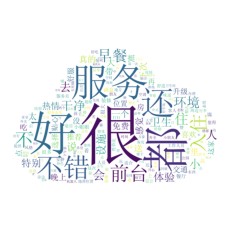

In [19]:
#词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 按word分组统计数目
frequencies = result.groupby(by = ['word'])['word'].count()
# 按数目降序排序
frequencies = frequencies.sort_values(ascending = False)
# 从文件中将图像读取为数组
backgroud_Image=plt.imread('./cloud.jpg')
wordcloud = WordCloud(font_path="D:\college\大二下\数据科学导论\期末提交\codes\《crawl-preprocess-storage》\source\simsun.ttf",#字体
                      max_words=200,            # 选择前100词
                      background_color='white',  # 背景颜色为白色
                      mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
# 将数据展示到二维图像上
plt.imshow(my_wordcloud)
# 关掉x,y轴
plt.axis('off') 
plt.show()

# 将图片导出
wordcloud.to_file("new_wordcloud.png")

# 数据存储

In [14]:
#存储评论
result.to_csv("storage-评论内容.csv", index = False, encoding = 'utf-8')

In [15]:
#将分词后的评论放进总体
#result.reset_index(inplace=True)
gb = result.groupby(['index_content'])
Result = gb['word'].unique()
print(Result)

index_content
0       [疫情, 沪, 周末, 住, 订, 大床, 房, 免费, 升级成, 江景, 窗外, 黄浦江,...
1       [保安, 师傅, 态度, 很, 好, 前台, 小, 哥哥, 小姐姐, 不错, 几天, 续住,...
2       [吐, 槽, 楼下, 停车场, 免费, 停车, 不, 说, 环境, 脏乱差, 停车位, 很少...
3       [入住, 中, 奇葩, 还, 行, 算, 对得起, 价格, 地段, 住, 车库, 最小, 最...
4       [预定, 豪华, 大床, 房, 没, 打扫, 完, 前台, 帮忙, 升级, 外滩, 江景, ...
                              ...                        
2824                        [精品, 细节, 都, 不错, 适合, 周末, 度, 假]
2825    [价格, 不算, 便宜, 层高, 面积, 有限, 但胜, 地理位置, 优越, 内, 花园, ...
2826    [刚, 开学, 小朋友, 班里, 病情, 请, 两天, 假, 避一避, 算是, 错峰, 带,...
2827    [早餐, 味道, 不错, 干净, 舒适, 提供, 免费, 饮料, 很, 惊喜, 户外, 小,...
2828    [装修, 风格, 简洁, 大方, 喜欢, 日式, 整体, 建筑, 低矮, 二层, 中心, 内...
Name: word, Length: 2822, dtype: object


In [16]:
df = pd.DataFrame(reviews)
df_reviews=df.rename(columns={"Unnamed: 0":"index_content" })

In [17]:
data_merge = pd.merge(left=df_reviews,right=Result,on='index_content',how='outer')
data_merge.head()
data_merge.to_csv("storage-总体结果.csv", index = False, encoding = 'utf-8')